# Лабораторная работа №1
## Поэлементные преобразования изображений

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

1. Считать цветное rgb изображение

In [2]:
img = cv2.imread("index.png")

2. Преобразовать изображение в градации серого

In [3]:
def decomp(img):
    return (img[:,:,2], img[:,:,1], img[:,:,0])

def grayscale(img):
    R, G, B = decomp(img)
    gray = R*0.2989 + G*0.587 + B*0.114
    return gray.astype('uint8')

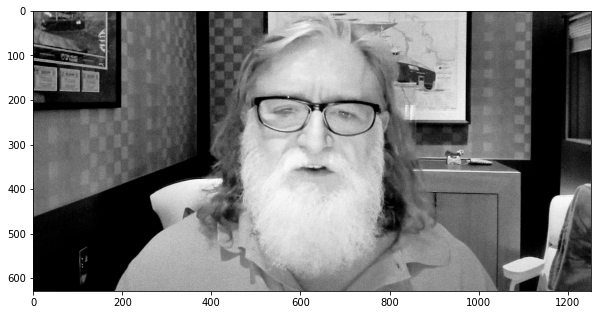

In [4]:
gray = grayscale(img)
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot()
ax.imshow(gray, cmap='Greys_r')
plt.show()

3. Написать функцию реализации препарирования изображения

In [5]:
def prepping(img, func):
    prep = []
    for i in range(len(img)):
        prep.append([])
        for j in range(len(img[0])):
            prep[-1].append(func(img[i][j]))
    return prep

4. По гистограмме изображения определить значение порога яркостей, обеспечивающего оптимальное разделение объекта и фона. Осуществить пороговую обработку входного изображения с найденным пороговым значением

In [6]:
def make_hist(img, draw=False, rtrn = True):
    hist = []
    for i in range(256):
        hist.append(0)
    for i in range (len(img)):
        for j in range(len(img[0])):
            hist[img[i][j]] +=1

            
    if draw:
        plt.plot(hist)
        plt.show()
    if rtrn:
        return hist

def binary(img, t, draw=True):
    copy = np.array(img, copy=True)
    for i in range(len(copy)):
        for j in range(len(copy[0])):
            if copy[i][j] <= t:
                copy[i][j] = 0
            else:
                copy[i][j] = 255


    if draw:
        fig = plt.figure(figsize=(10,10))
        ax = fig.add_subplot()
        ax.imshow(copy, cmap='Greys_r')
        plt.show() 
    return copy

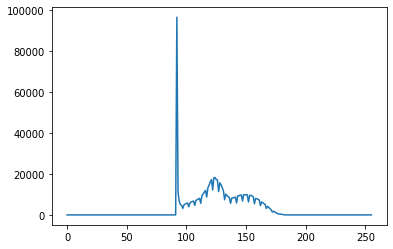

In [7]:
hist = make_hist(gray, draw=True)

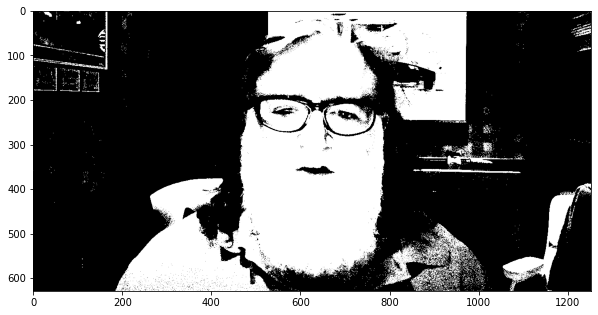

In [8]:
binary_own = binary(gray, 137)

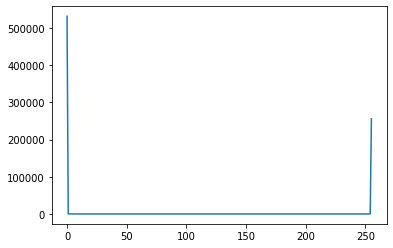

In [9]:
make_hist(binary_own, draw=True, rtrn=False)

5. Сделать пороговую обработку методом Otsu (Функция OpenCV)

(<AxesSubplot:>, <matplotlib.image.AxesImage at 0x17b08532530>)

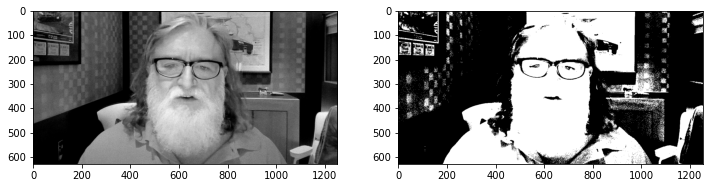

In [12]:
ret, th1 = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY+cv2.THRESH_OTSU)
plt.figure(figsize=(12,10))
plt.subplot(221),plt.imshow(gray,'gray')
plt.subplot(222),plt.imshow(th1,'gray')

Гисторграмма OpenCV реализации метода Otsu


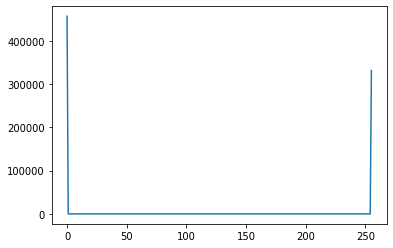

In [13]:
print("Гисторграмма OpenCV реализации метода Otsu")
make_hist(th1, draw=True, rtrn=False)

6. Определить динамический диапазон входного изображения. Осуществить линейное контрастирование входного изображения в заданный динамический диапазон яркостей

In [14]:
def find_edges(img):
    mn = img.min()
    mx = img.max()
    return (mn, mx)

def line_contrasting(img):
    copy = np.array(img, copy=True)
    min, max = find_edges(img)
    copy = (img-min)/(max-min)*255
    return copy.astype('uint8')

(<AxesSubplot:>, [<matplotlib.lines.Line2D at 0x17b0863c9a0>])

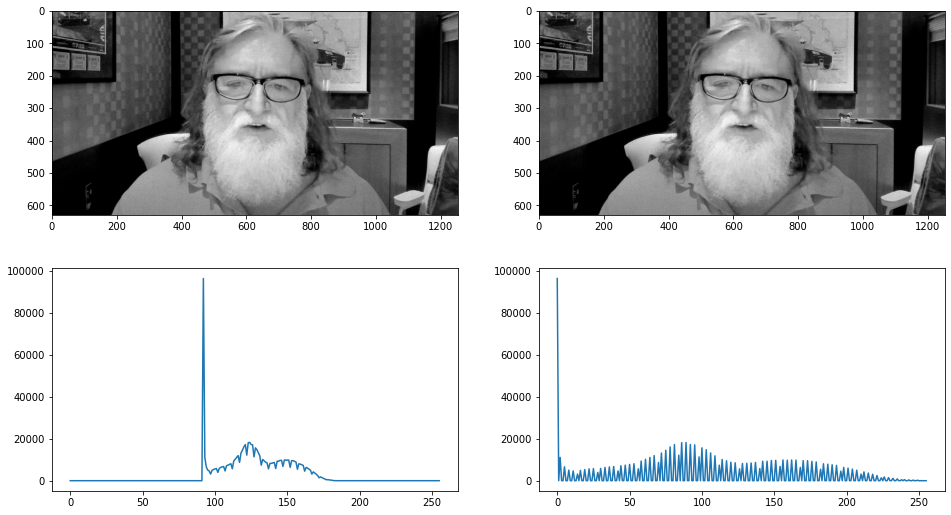

In [15]:
contr = line_contrasting(gray)
plt.figure(figsize=(16,9))
plt.subplot(221),plt.imshow(gray,'gray')
plt.subplot (222), plt.imshow(contr,'gray')
plt.subplot(223),plt.plot(make_hist(gray))
plt.subplot(224),plt.plot(make_hist(contr))

7. Сделать эквализацию гистограммы изображения

In [22]:
def F(x):
    return np.array(hist[:int(x)+1]).sum()       

def equalize(img):
    h = make_hist(img)
    F_min = sum(hist)

    for i in range(256):
        a = F(i)
        if a!=0 and a<F_min:
            F_min = a

    copy = np.array(img, copy=True)
    for i in range(img.shape[0]):
        for j in range(img.shape[1]):
            x = img[i][j]
            copy[i][j] = round(((F(x) - F_min)/(img.size - 1))*255)
    return copy

In [24]:
eq_img = equalize(gray)

(<AxesSubplot:>, [<matplotlib.lines.Line2D at 0x17b08808af0>])

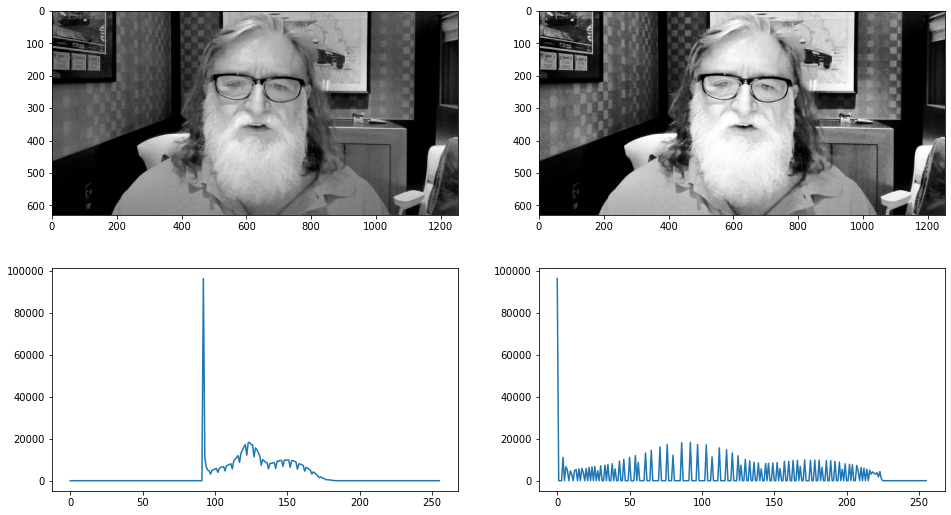

In [25]:
plt.figure(figsize=(16,9))
plt.subplot(221),plt.imshow(gray,'gray')
plt.subplot (222), plt.imshow(eq_img,'gray')
plt.subplot(223),plt.plot(make_hist(gray))
plt.subplot(224),plt.plot(make_hist(eq_img))

8. Сделать эквализацию методом CLAHE (Функция OpenCV)

In [25]:
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))

In [26]:
import random
te = np.array(gray, copy=True)
te = sorted(te, key=lambda *args: random.random())
dst = clahe.apply(np.array(te))

(<AxesSubplot:>, [<matplotlib.lines.Line2D at 0x202bda01fd0>])

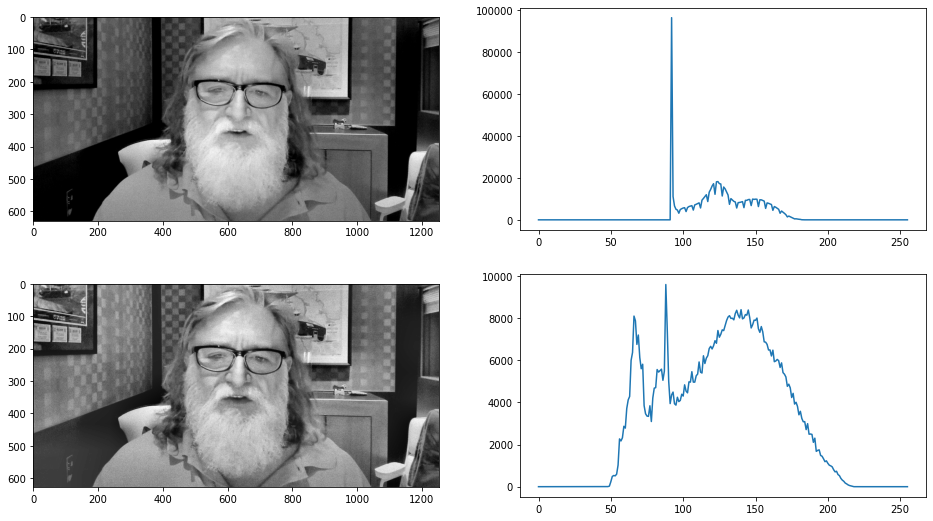

In [27]:
dsst_orig = clahe.apply(gray)
plt.figure(figsize=(16,9))
plt.subplot(221),plt.imshow(gray,'gray')
plt.subplot (222), plt.plot(make_hist(gray))
plt.subplot(223),plt.imshow(dsst_orig,'gray')
plt.subplot(224),plt.plot(make_hist(dsst_orig))

9. Осуществить препарирование изображения с заданной препарирующей функцией

In [28]:
def func3(x, t=140):
    y = x if x < t else 255.
    return (round(y))
prep = prepping(gray, func3)

In [31]:
def print_prep(func):
    x = []
    y = []

    for i in range(256):
        x.append(i)
        y.append(func(i))

    fig, ax = plt.subplots()
    ax.plot(x,y)

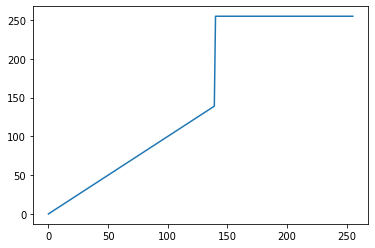

In [32]:
print_prep(func3)

(<AxesSubplot:>, [<matplotlib.lines.Line2D at 0x17b09a75e70>])

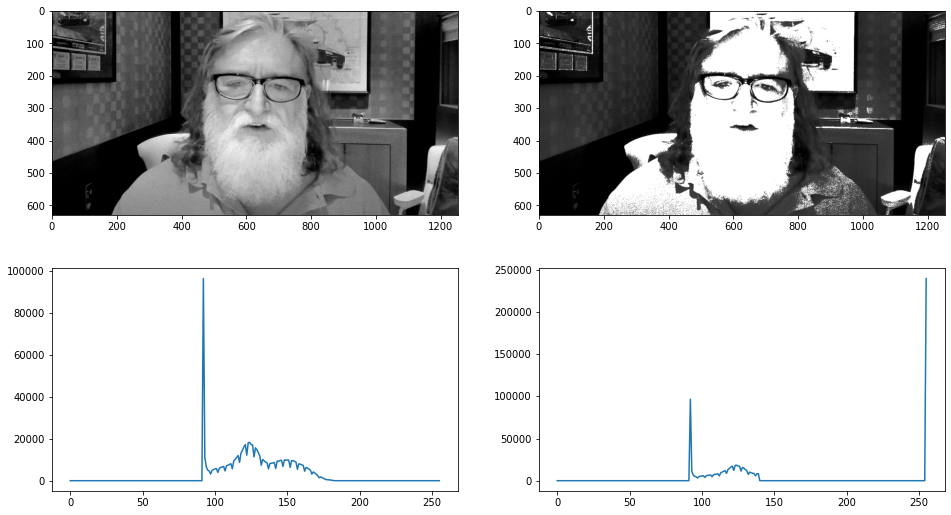

In [33]:
plt.figure(figsize=(16,9))
plt.subplot(221),plt.imshow(gray,'gray')
plt.subplot (222), plt.imshow(prep,'gray')
plt.subplot(223),plt.plot(make_hist(gray))
plt.subplot(224),plt.plot(make_hist(prep))